## Plot SS Bouncepoints

In [33]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("ss.db")
cur  = conn.cursor()

df = pd.read_sql_query("SELECT MidLat, MidLon from bouncepoints", conn)



df2 = pd.read_sql_query("SELECT * from errors", conn)

conn.close()

df2


,index,Status
0,2197,OK
1,2300,OK
2,2301,OK
3,2302,OK
4,2305,OK
5,2307,OK
6,2309,OK
7,2312,No Data at II.ALE
8,2321,OK
9,2342,OK


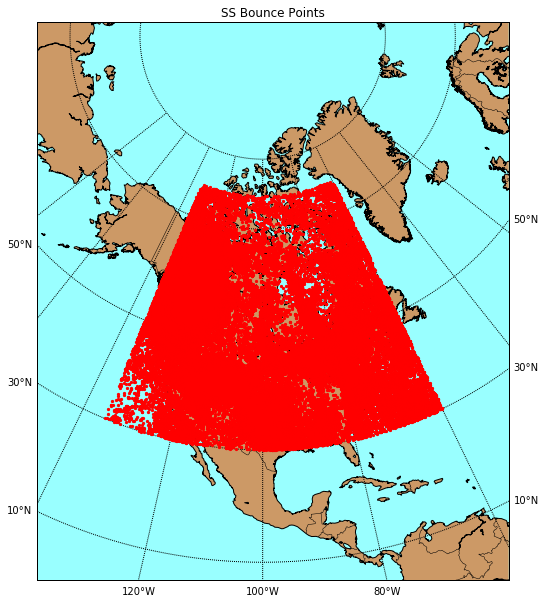

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-135.,llcrnrlat=0.,urcrnrlon=45.,urcrnrlat=61.,
            projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
            resolution ='l',area_thresh=1000.)
# read shapefile.
#shp_info = m.readshapefile('../../../examples/huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []

plt.figure(1,figsize=(10,10))

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

x, y = m( np.array(df['MidLon']), np.array(df['MidLat']) )

m.scatter(x, y, color='red', marker = '.', zorder = 10000)

plt.title('SS Bounce Points')
plt.savefig('bpts_NA.eps')
plt.show()